In [1]:
import shap, eli5
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

shap.initjs()

In [2]:
X, y = shap.datasets.adult(display=True)
y = np.array([int(label) for label in y])
cat_cols = X.select_dtypes(['category']).columns
X[cat_cols] = X[cat_cols].apply(lambda x: x.cat.codes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(22792, 12) (9769, 12)


In [20]:
X, y = shap.datasets.adult(display=True)
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
rf = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [ ]:
%time explainer = shap.TreeExplainer(rf)

In [ ]:
%time shap_values = explainer.shap_values(X_test.iloc[:1000,:])

# Variable / Feature Importance

### Feature importance is calculated by randomizing a features column and holding everything else constant, passing it through your trained model, and seeing how much your accuracy metric drops

In [4]:
def feat_importance(model, df):
    fi = pd.DataFrame({'cols':df.columns, 'importance':model.feature_importances_}
                     ).sort_values('importance', ascending=False)
    return fi.plot('cols', 'importance', 'barh', figsize=(12,7), legend=False)

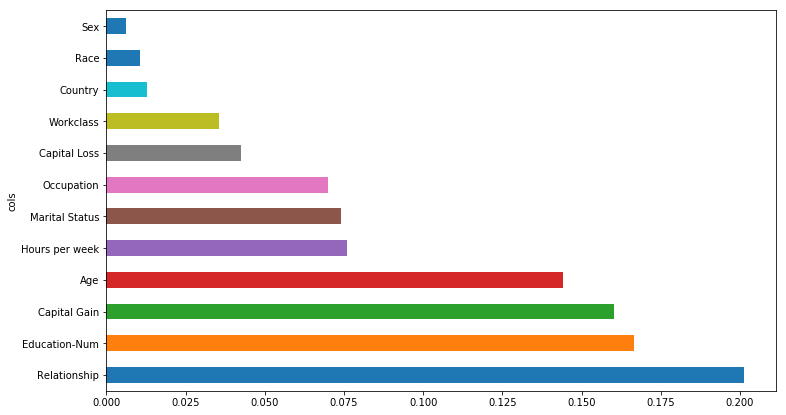

In [5]:
feat_importance(rf, X_train)

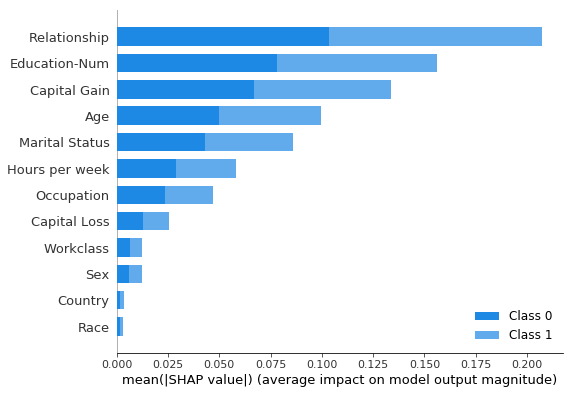

In [8]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Partial Dependency

Note: Might need to index values (e.g. shap_values[1]) if slicing dataframe

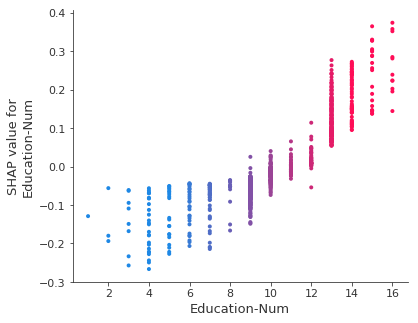

In [72]:
shap.dependence_plot(ind="Education-Num", interaction_index="Education-Num",
                     shap_values=shap_values[1], 
                     features=X_test.iloc[:1000,:],
                     display_features=X_test_disp)

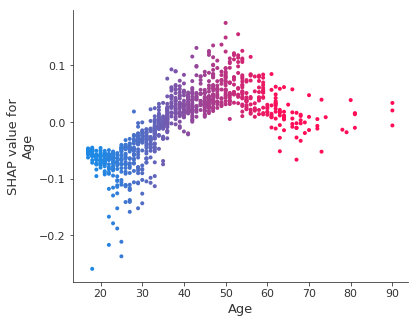

In [73]:
shap.dependence_plot(ind="Age", interaction_index="Age",
                     shap_values=shap_values[1], 
                     features=X_test.iloc[:1000,:],
                     display_features=X_test_disp)

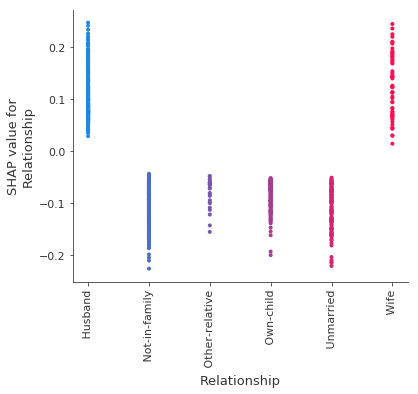

In [74]:
shap.dependence_plot(ind="Relationship", interaction_index="Relationship",
                     shap_values=shap_values[1], 
                     features=X_test.iloc[:1000,:],
                     display_features=X_test_disp)

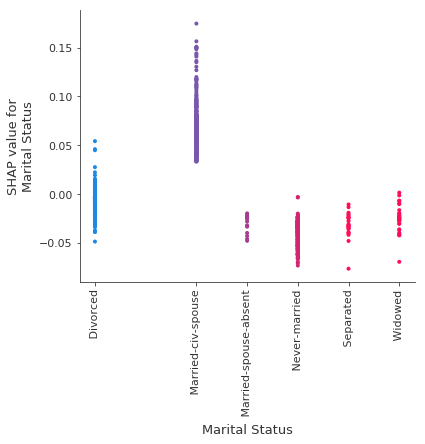

In [75]:
shap.dependence_plot(ind="Marital Status", interaction_index="Marital Status",
                     shap_values=shap_values[1], 
                     features=X_test.iloc[:1000,:],
                     display_features=X_test_disp)

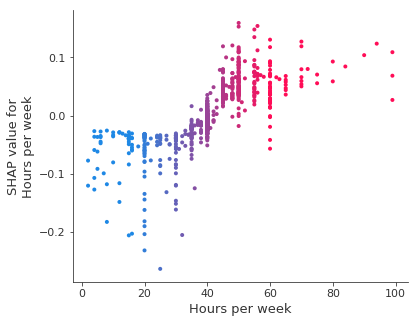

In [79]:
shap.dependence_plot(ind="Hours per week", interaction_index="Hours per week",
                     shap_values=shap_values[1], 
                     features=X_test.iloc[:1000,:],
                     display_features=X_test_disp)

# Tree Interpreter (ELI5)

In [77]:
eli5.show_prediction(rf, X_test.iloc[87], 
                     feature_names=list(X.columns),
                     show_feature_values=True)

In [78]:
eli5.show_prediction(rf, X_test.iloc[318], 
                     feature_names=list(X.columns),
                     show_feature_values=True)

# Tree Interpreter for Individual Prediction (SHAP)

In [70]:
shap.force_plot(explainer.expected_value[1], shap_values[1][87], X_test.iloc[87,:])

In [76]:
shap.force_plot(explainer.expected_value[1], shap_values[1][318], X_test.iloc[318,:])

# Tree Interpreter for Range of Predictions (SHAP)

In [43]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:1000,:])

In [25]:
%time shap_values = explainer.shap_values(X_test.iloc[:100,:])

CPU times: user 4.15 s, sys: 47.5 ms, total: 4.2 s
Wall time: 4.19 s


In [26]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:100,:])